# Imports

In [35]:
%matplotlib inline

In [36]:
import matplotlib.pyplot as plt
import hpbandster.core.result as hpres
import hpbandster.visualization as hpvis


# Grab results
Note that the directory passed in must contain both the 'results.json' and 'configs.json' files in order to parse the data correctly.

In [37]:
dir = '/Users/PB/Desktop/YPBAI/Optimization Results/2018-12-11 -- ISIC lr,mom,dropout'
result = hpres.logged_results_to_HBS_result(dir)

In [38]:
# Get all executed runs.
all_runs = result.get_all_runs()

In [39]:
# Get the dict that translates config ids to configurations used.
id2conf = result.get_id2config_mapping()

In [40]:
# Grab the ID of the incumbent, aka the best configuration (the one that results in the lowest validation loss [1 -valid_acc]).
inc_id = result.get_incumbent_id()

# Note that the incumbent configuration may correspond to multiple runs. Grab the last run with the incumbent configuration.
inc_runs = result.get_runs_by_id(inc_id)
inc_run = inc_runs[-1]

# Print the best configuration

In [41]:
# Grab the validation loss for the incumbent run.
inc_loss = inc_run.loss

# Grab the configuration for the incumbent run.
inc_config = id2conf[inc_id]['config']

# Grab the test loss for the incumbent run.
inc_test_loss = inc_run.info['test accuracy']

In [42]:
print('Best found configuration:')
print(inc_config)
print('This configuration achieved accuracies of %f (validation) and %f (test).'%(1-inc_loss, inc_test_loss))
print('A total of %i unique configurations were sampled.' % len(id2conf.keys()))
print('A total of %i runs were executed.' % len(result.get_all_runs()))
print('Total budget corresponds to %.1f full function evaluations.'%(sum([r.budget for r in result.get_all_runs()])/9))

Best found configuration:
{'lr': 0.00689831315016478, 'sgd_momentum': 0.7238025365311342, 'dropout_rate': 0.5752936429501725}
This configuration achieved accuracies of 0.666667 (validation) and 0.686667 (test).
A total of 40 unique configurations were sampled.
A total of 48 runs were executed.
Total budget corresponds to 10.7 full function evaluations.


# Plot losses grouped by budget
Budget in the typical case refers to the number of training epochs used. However, you can also pretty easily configure the code to have budget refer to other things (number of images trained, etc.)

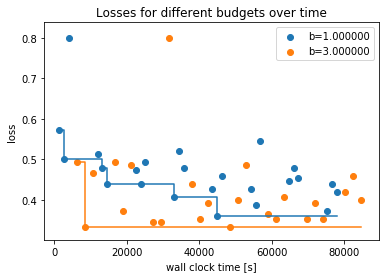

In [43]:
# Note that this plots validation loss (1 - validation accuracy)
hpvis.losses_over_time(all_runs)
plt.show()

# Plot the number of concurrent runs over time.

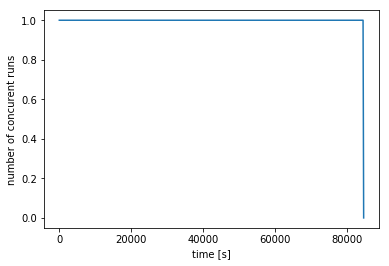

In [44]:
hpvis.concurrent_runs_over_time(all_runs)
plt.show()

# Plot the number of finished runs over time and per budget.

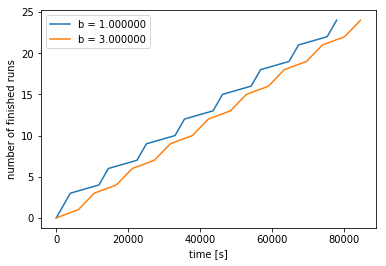

In [45]:
hpvis.finished_runs_over_time(all_runs)
plt.show()

# Plot the loss distribution for the model results vs. that for random selection

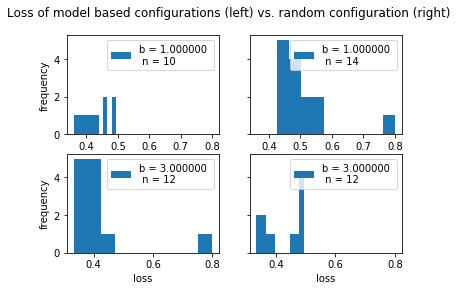

In [46]:
hpvis.performance_histogram_model_vs_random(all_runs, id2conf)
plt.show()

# Plot the Spearman rank correlation coefficients of the losses between budgets

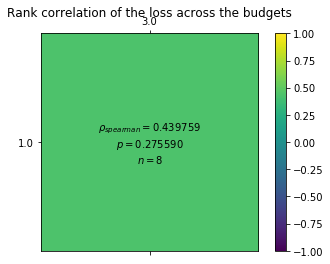

In [47]:
hpvis.correlation_across_budgets(result)
plt.show()

# Plot interactive learning curves (validation loss as a function of budget)

In [52]:
# Configurations using different budgets are plotted as connected dots of the same color.
lcs = result.get_learning_curves()
%matplotlib qt
hpvis.interactive_HBS_plot(lcs, tool_tip_strings=hpvis.default_tool_tips(result, lcs))
plt.show()

# Plot interactive learning curves (test loss as a function of time)

In [55]:
def realtime_learning_curves(runs):
    """
    example how to extract a different kind of learning curve.

    The x values are now the time the runs finished, not the budget anymore.
    We no longer plot the validation loss on the y axis, but now the test accuracy.

    This is just to show how to get different information into the interactive plot.

    """
    sr = sorted(runs, key=lambda r: r.budget)
    lc = list(filter(lambda t: not t[1] is None, [(r.time_stamps['finished'], r.info['test accuracy']) for r in sr]))
    return([lc,])

lcs = result.get_learning_curves(lc_extractor=realtime_learning_curves)

hpvis.interactive_HBS_plot(lcs, tool_tip_strings=hpvis.default_tool_tips(result, lcs))

(<Figure size 432x288 with 4 Axes>,
 <matplotlib.widgets.Button at 0xea9eb00>)